In [1]:
import urllib
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the stock data from naver.com

In [2]:
dates = []
date_strs = []
last_trade_prices = []

values = []

for n_page in range(500):
    raw_url = 'http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page='
    url = raw_url + str(n_page+1)      # http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=n_page
    
    #Get data (parse)
    soup = BeautifulSoup(urllib.request.urlopen(url).read())
    date_info = soup.find_all('td', {'class': 'date'})
    value_info = soup.find_all('td', {'class': 'number_1'})
    n_data = len(value_info)
    
    for i in range(n_data):
        #Date
        current_date = str(date_info[int(i/4)])                       #Each date have 4 values
        current_date = current_date.replace('<td class="date">', '')
        current_date = current_date.replace('</td>', '')
        current_date = current_date.replace('.', '')
        
        
        #Values
        current_data = str(value_info[i])
        current_data = current_data.replace('<td class="number_1">', '')
        current_data = current_data.replace('</td>', '')
        current_data = current_data.replace('<span class="tah p11 red01">','')
        current_data = current_data.replace('</span>','')
        current_data = current_data.replace('<td class="number_1" style="padding-right:40px;">','')
        current_data = current_data.replace('<td class="number_1" style="padding-right:30px;">','')
        current_data = current_data.replace('<span class="tah p11 nv01">','')
        current_data = current_data.replace(' ','')
        current_data = current_data.replace('\n','')
        current_data = current_data.replace('\t','')
        current_data = current_data.replace(',','')
        
        values.append(current_data)
        
        if i % 4 == 0:
#             print('\nCurrent date is ', current_date)    #Naver stock doesnt have Saturday & Sunday
            date_strs.append(current_date)
            dates.append(float(current_date))
#             print('Last traded price: ', current_data)
            last_trade_prices.append(float(current_data))
#         elif i % 4 == 1:
#             print('Fluctuation ratio: ', current_data)
#         elif i % 4 == 2:
#             print('Traded volume: ', current_data)
#         elif i % 4 == 3:
#             print('Traded price: ', current_data)
            
        
#Reverse
dates.reverse()   #Change the order of the list (asending)
date_strs.reverse()
last_trade_prices.reverse()

C:\Users\StrikeWade\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\StrikeWade\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


# PLOT

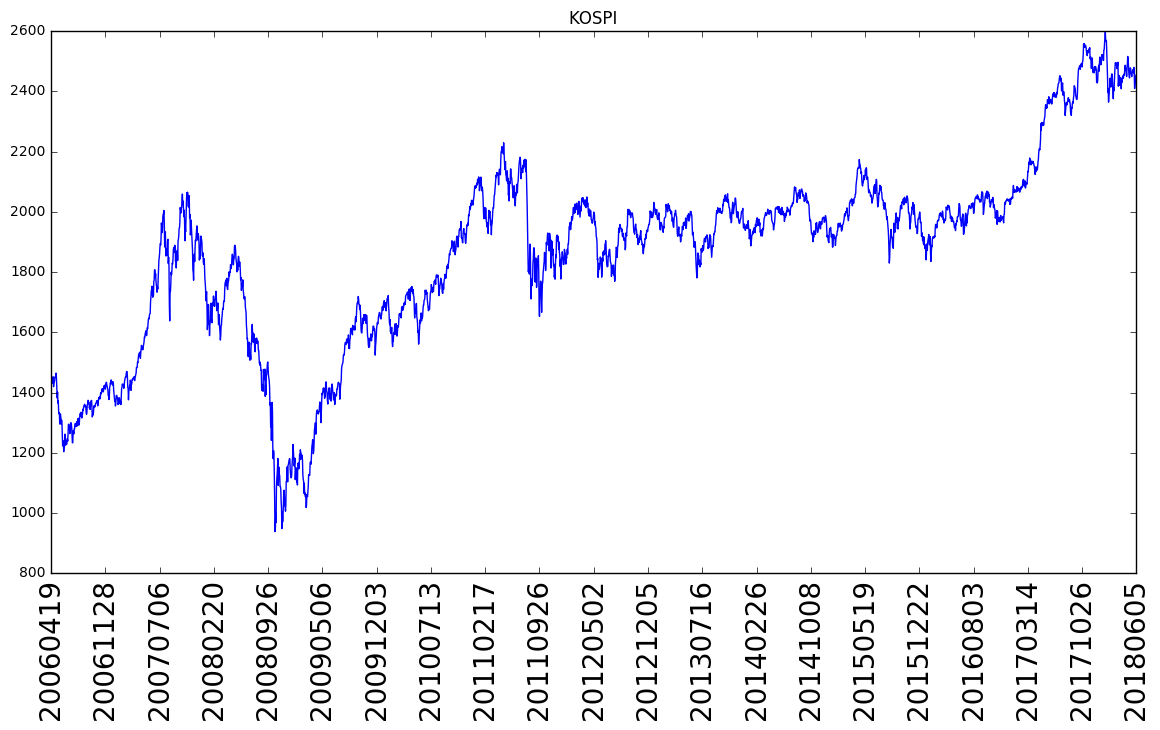

In [3]:
xtick_input = []
plt.figure(1, figsize=(14,7))
n = len(last_trade_prices)
x = list(range(n))
step = int(n/20)

xtick_input = x[0:n:step]
xtick_input.append(x[-1])
xtick_str = date_strs[0:n:step]
xtick_str.append(date_strs[-1])

plt.xticks(xtick_input, xtick_str, fontsize=20, rotation='vertical')
plt.plot(x, last_trade_prices, '-')
plt.title('KOSPI')

# GPR on this data 

In [22]:
# def kernel_se(X1, X2, g2, l2, w2):
#     n1 = X1.shape[0]
#     n2 = X2.shape[0]
#     K = np.zeros((n1,n2))
#     for i in range(n1):
#         for j in range(n2):
#             x1 = X1[i, :]
#             x2 = X2[j, :]
#             d = x1 - x2
#             K[i, j] = g2*np.exp(-d*d/l2)
#             if n1 > 1 and i == j:
#                 K[i, j] = K[i, j] + w2
#     return K


def kernel_se(X1, X2, g2, l2, w2):
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    K  = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            x1 = X1[i, :]
            x2 = X2[j, :]
            d  = x1 - x2
            K[i, j] = g2*np.exp(-d*d/(l2))
            if n1 > 1 and i == j:
                K[i, j] = K[i, j] + w2
    return K

# GPR (Global Property Research)

GPR ready


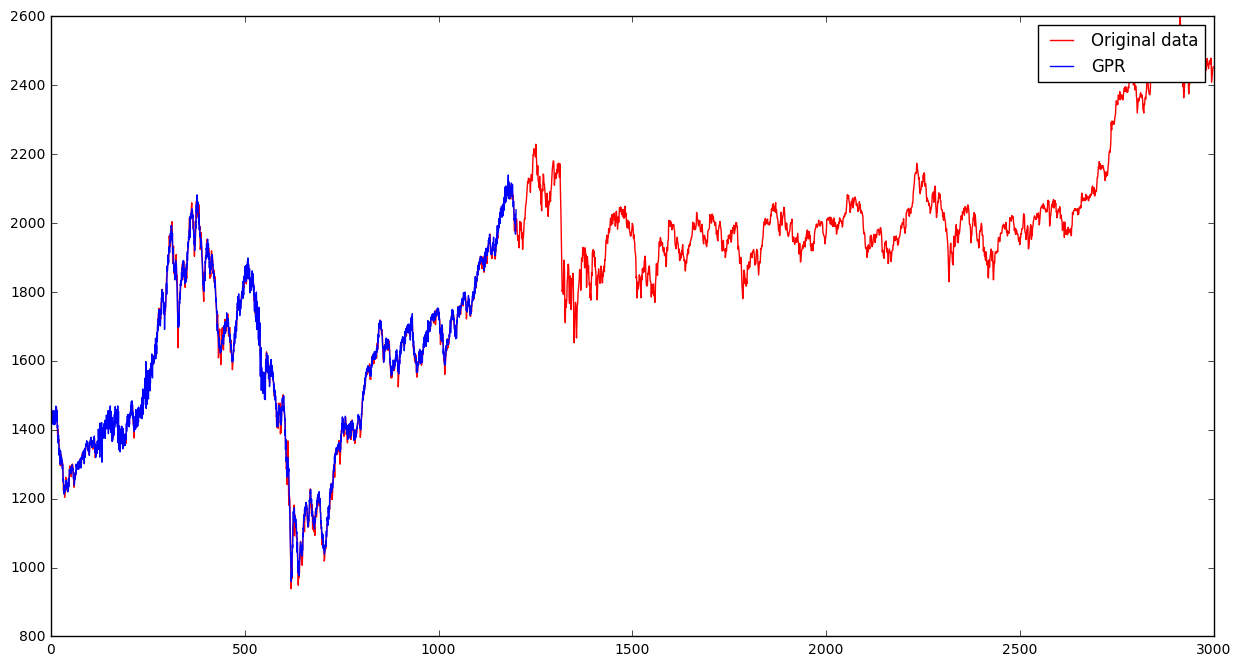

In [23]:
# x_data = np.array(x).reshape(-1, len(x)).T
# y_data = np.array(last_trade_prices).reshape(-1, len(last_trade_prices)).T

# y_data_mz = y_data - np.mean(y_data)
# x_test = np.array([np.linspace(0,1200,3000)]).T

# g2 = 1
# l2 = 30
# w2 = 1e-1

# K_data = kernel_se(x_data, x_data, g2, l2, w2)
# alpha = np.matmul(np.linalg.inv(K_data), y_data_mz)
# K_test = kernel_se(x_test, x_data, g2, l2, w2)
# y_test = np.matmul(K_test, alpha) + np.mean(y_data)


xdata = np.array(x).reshape(-1, len(x)).T
ydata = np.array(last_trade_prices).reshape(-1, len(last_trade_prices)).T
ydata_mz = ydata - np.mean(ydata)
xtest = xtest = np.array([np.linspace(0, 1200, 3000)]).T
g2    = 1
l2    = 30
w2    = 1e-1
Kdata = kernel_se(xdata, xdata, g2, l2, w2)
alpha = np.matmul(np.linalg.inv(Kdata), ydata_mz)
Ktest = kernel_se(xtest, xdata, g2, l2, w2)
ytest = np.matmul(Ktest, alpha) + np.mean(ydata)
print ("GPR ready")

# Plot 
plt.figure(1, figsize=(15, 8))
plt.plot(xdata[:, 0], ydata[:, 0], 'r-', label='Original data')
plt.plot(xtest[:, 0], ytest[:, 0], 'b-', label='GPR')
plt.legend()

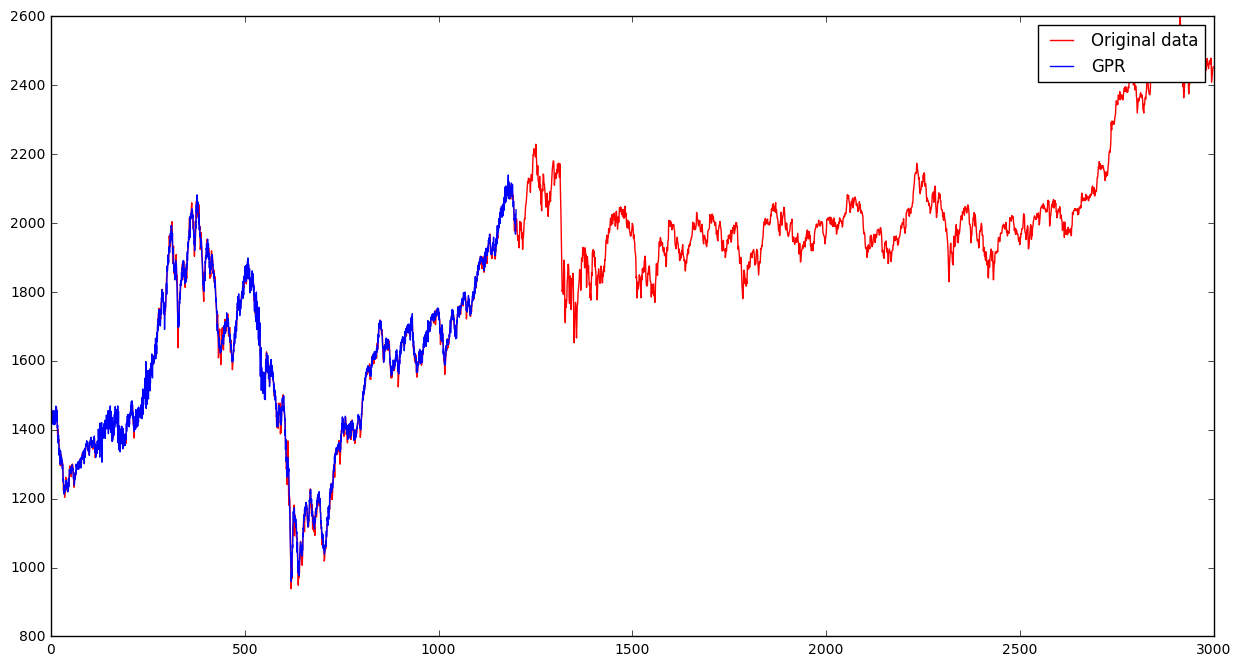

In [13]:
# plt.figure(1, figsize=(15, 8))
# plt.plot(x_data[:, 0], y_data[:, 0], 'r-', label='Original data')
# plt.plot(x_test[:, 0], y_test[:, 0], 'b-', label='GPR')
# plt.legend()